In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import os
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
raw_data_path = os.path.join(project_path,'Data\\Raw_Data')
train_data_path = os.path.join(raw_data_path,'train.csv')
test_data_path = os.path.join(raw_data_path,'test.csv')

In [3]:
raw_data_train = pd.read_csv(train_data_path)
raw_data_test = pd.read_csv(test_data_path)

train_data = raw_data_train.copy()
test_data = raw_data_test.copy()

# Exploring Source Variables

### shape of data

In [4]:
train_data.shape #891 entries, 12 variables

(891, 12)

### nulls in data

In [5]:
(train_data.isnull().sum()).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### uniqueness of data

In [6]:
dic = dict()

for column in train_data.columns:
    column_uniqueness = train_data[column].nunique()/train_data.shape[0]*100
    dic[column] = round(column_uniqueness,2)
pd.Series(dic).sort_values(ascending=False)

Name           100.00
PassengerId    100.00
Ticket          76.43
Fare            27.83
Cabin           16.50
Age              9.88
Parch            0.79
SibSp            0.79
Embarked         0.34
Pclass           0.34
Sex              0.22
Survived         0.22
dtype: float64

In [7]:
train_data.describe() #for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Variables Vs Survival

### Functions used

In [8]:
def colors_list(unique_list):
    length = len(unique_list)
    colors_list = ['orange']
    colors_list.extend(['blue']*(length-1))
    return colors_list

In [9]:
def colors_list_sorted(train_data_copy,var_name,var_unique_list):
    train_data_copy = train_data_copy.set_index(var_name)
    means_index_sorted = pd.DataFrame(train_data_copy.groupby(level=0)['Survived'].mean()).sort_values(by='Survived',ascending=False)
    colors_listed = colors_list(var_unique_list)
    colors_df = pd.DataFrame(index = means_index_sorted.index, data= {'colors': colors_listed})
    colors_df = colors_df.sort_index()
    return list(colors_df.sort_index()['colors'])
    

In [10]:
def variable_mean_survival(var_name):
    train_data_copy = train_data[~train_data[var_name].isna()]
    var_unique_list = sorted(list(train_data_copy[var_name].unique()))     
    countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId'] 
    avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']

    colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
                                      
    return var_unique_list, countPerVarValue, avg_survival, colors_map

In [11]:
def plt_settings(cur_plt, ititle):
    ax = plt.gca()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.get_yaxis().set_visible(False)  
    plt.title(ititle)
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
                ha='center', va='bottom')    

In [12]:
def setup_legends(colors_dict, plt):
    labels = list(colors_dict.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in labels]
    plt.subplot(1, 3, 2)
    plt_settings(plt,'')
    plt.gca().get_xaxis().set_visible(False)  
    plt.legend(handles, labels);

## Sex Vs Survival

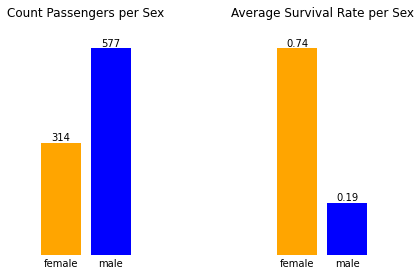

In [13]:
unique_sexes,sex_value_count, avg_survival,colors_map = variable_mean_survival('Sex')

plt.subplot(1, 3, 1)
plt.bar(unique_sexes,sex_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Sex\n')

plt.subplot(1, 3, 3)
plt.bar(unique_sexes,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Sex\n')

## Embarked Vs Survival 

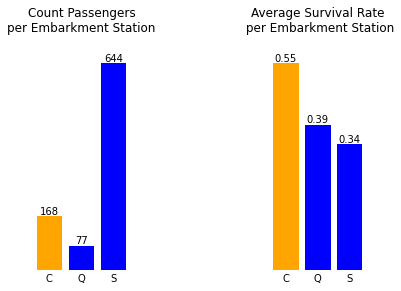

In [14]:
unique_embark,embark_value_count, avg_survival,colors_map = variable_mean_survival('Embarked')

plt.subplot(1, 3, 1)
plt.bar(unique_embark,embark_value_count,color=colors_map)
plt_settings(plt,'Count Passengers\nper Embarkment Station\n')

plt.subplot(1, 3, 3)
plt.bar(unique_embark,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\n per Embarkment Station\n')

## Pclass Vs Survival

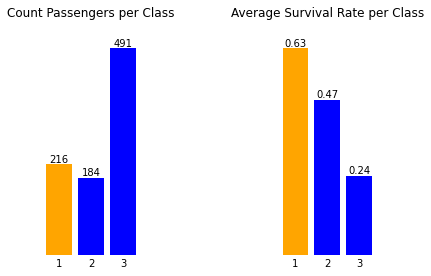

In [15]:
unique_class,class_value_count, avg_survival,colors_map = variable_mean_survival('Pclass')

plt.subplot(1, 3, 1)
plt.bar(unique_class,class_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Class\n')

plt.subplot(1, 3, 3)
plt.bar(unique_class,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Class\n')

## SibSp, Parch Vs Survival

### SibSp Vs Survival

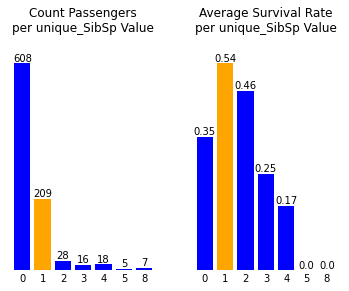

In [16]:
unique_SibSp,SibSp_value_count, avg_survival,colors_map = variable_mean_survival('SibSp')

plt.subplot(1,2,1) 
plt.bar(list(map(str,unique_SibSp)), SibSp_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper unique_SibSp Value\n')

plt.subplot(1, 2, 2)
plt.bar(list(map(str,unique_SibSp)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper unique_SibSp Value\n')

### Parch Vs Survival

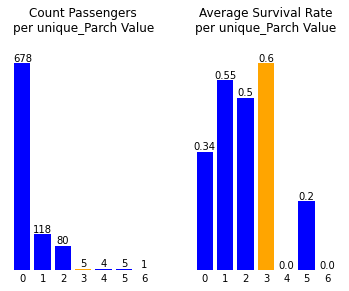

In [17]:
unique_Parch,Parch_value_count, avg_survival,colors_map = variable_mean_survival('Parch')

plt.subplot(1,2,1) 
plt.bar(list(map(str,unique_Parch)), Parch_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper unique_Parch Value\n')

plt.subplot(1, 2, 2)
plt.bar(list(map(str,unique_Parch)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper unique_Parch Value\n')

### Family Vs Survival
Combine SibSp and Parch in one column indicating whether or not the passenger was travelling alone

In [18]:
def family_flag(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

In [19]:
train_data['Family_flag']  = train_data.apply(family_flag, axis=1)

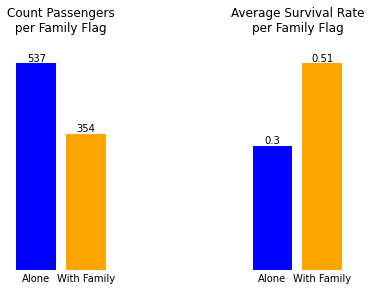

In [20]:
unique_famFlag,famFlag_value_count, avg_survival,colors_map = variable_mean_survival('Family_flag')

plt.subplot(1,3,1) 
plt.bar(list(map(str,unique_famFlag)), famFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\n per Family Flag \n')
plt.xticks(ticks=[0,1],labels=['Alone','With Family']);

plt.subplot(1, 3, 3)
plt.bar(list(map(str,unique_famFlag)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Family Flag\n')
plt.xticks(ticks=[0,1],labels=['Alone','With Family']);

## Age Vs Survival

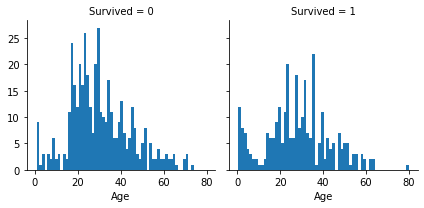

In [21]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=60)

### Age Group

In [22]:
#sort the ages into age groups #explore more about binning!
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_data.Age, bins, labels = labels)
train_data['Age_Group'] = age_groups
train_data['Age_Group'] = train_data['Age_Group'].astype(str)

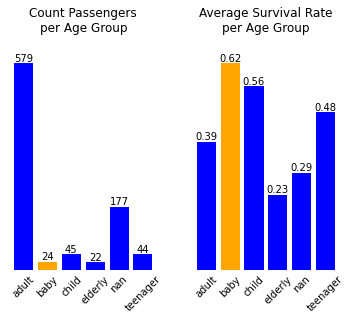

In [23]:
unique_ageGroup,ageGroup_value_count, avg_survival,colors_map = variable_mean_survival('Age_Group')

plt.subplot(1,2,1) 
plt.bar(unique_ageGroup, ageGroup_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper Age Group\n')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(unique_ageGroup,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Age Group\n')
plt.xticks(rotation=45);

## Cabin Vs Survival

Following the idea that passengers of no cabin stated are of lower classes

In [24]:
train_data['Cabin_Flag'] = train_data["Cabin"].notnull().astype('int')

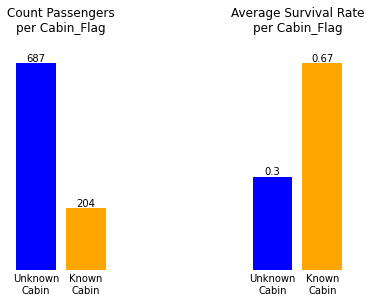

In [25]:
unique_cabinFlag,cabinFlag_value_count, avg_survival,colors_map = variable_mean_survival('Cabin_Flag')

plt.subplot(1,3,1) 
plt.bar(unique_cabinFlag, cabinFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1],labels=['Unknown\nCabin','Known\nCabin'])

plt.subplot(1, 3, 3)
plt.bar(unique_cabinFlag,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1],labels=['Unknown\nCabin','Known\nCabin']);
 

## Fare Vs Survival

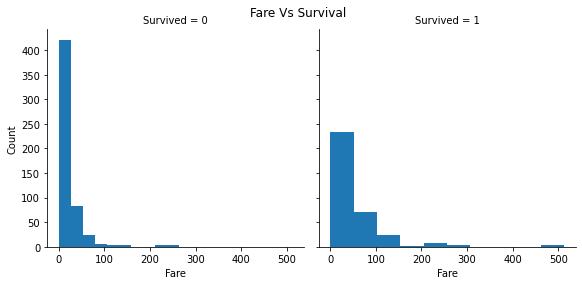

In [26]:
g = sns.FacetGrid(train_data, col ="Survived", height=4,aspect=1) 
g.map(plt.hist, "Fare") 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Fare Vs Survival\n');
for ax in g.axes.flat:
    ax.set_ylabel('Count')
    break

## Name - Title Vs Survival

In [31]:
train_data['passenger_title'] = train_data.Name.apply(lambda x: x.split(',',1)[1].split('.')[0].strip()).values

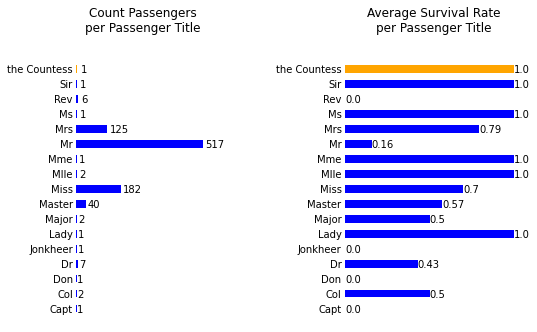

In [33]:
unique_title,title_value_count, avg_survival,colors_map = variable_mean_survival('passenger_title')

plt.figure(figsize=(8,5))
gspec = gridspec.GridSpec(24, 50)
plot1 = plt.subplot(gspec[:, :15])
plot1.barh(unique_title, title_value_count, height = 0.5, color=colors_map)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Count Passengers\nper Passenger Title\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    ax.text( v + rect.get_width(), i-.25 , str(rect.get_width()))
    
plot2 = plt.subplot(gspec[:, 30:]) 
   
plot2.barh(unique_title, avg_survival, height = 0.5, color=colors_map)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Average Survival Rate\nper Passenger Title\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    width = rect.get_width()
    ax.text(rect.get_width() , i-.25 , str(round(width,2)))
   

### Ticket Vs Survival

In [34]:
train_data['Numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

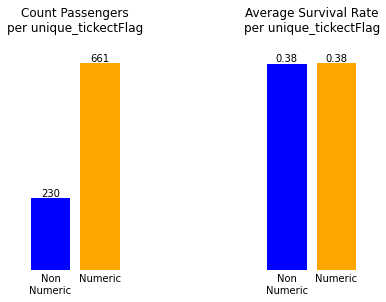

In [35]:
unique_tickectFlag,tickectFlag_value_count, avg_survival,colors_map = variable_mean_survival('Numeric_ticket')

plt.subplot(1,3,1) 
plt.bar(unique_tickectFlag, tickectFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper unique_tickectFlag\n')
plt.xticks(ticks=[0,1],labels=['Non\nNumeric','Numeric']);

plt.subplot(1, 3, 3)
plt.bar(unique_tickectFlag,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper unique_tickectFlag\n')
plt.xticks(ticks=[0,1],labels=['Non\nNumeric','Numeric']);

# Dealing with Nulls and Missing values

In [36]:
titanic_train_data = train_data.copy()

### Embaked
has only 2 missing values, so they will be dropped

In [37]:
titanic_train_data.dropna(subset=['Embarked'],inplace = True)

### Age
- replace missing ages by avg age of passengers of the same class
- re-categorize passengers into Age Groups after filling missing values

In [38]:
def get_class_avgAge():
    return titanic_train_data.groupby('Pclass')['Age'].mean()

def derive_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return get_class_avgAge()[Pclass]
    else:
        return Age

titanic_train_data['Age'] = titanic_train_data[['Age','Pclass']].apply(derive_age,axis=1)  
titanic_train_data['Age'] = round(titanic_train_data['Age'], 2)

bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(titanic_train_data.Age, bins, labels = labels)
titanic_train_data['Age_Group'] = age_groups
titanic_train_data['Age_Group'] = titanic_train_data['Age_Group'].astype(str)

## Fare
replace missing fares wih avg class fare 

In [39]:
def get_class_avgFare():
    return titanic_train_data.groupby('Pclass')['Fare'].mean()
    
def derive_Fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        return get_class_avgFare()[Pclass]
    else:
        return Fare   
    
titanic_train_data['Fare'] = titanic_train_data[['Fare','Pclass']].apply(derive_Fare,axis=1)    

## Data types handling
turn categorical data and Flags into str instead of int

In [40]:
titanic_train_data.Pclass = titanic_train_data.Pclass.astype(str)
titanic_train_data.Numeric_ticket = titanic_train_data.Numeric_ticket.astype(str)
titanic_train_data.Cabin_Flag = titanic_train_data.Cabin_Flag.astype(str)
titanic_train_data.Family_flag = titanic_train_data.Family_flag.astype(str)

## Saving Processed Data

In [49]:
processed_data_path  = os.path.join(project_path,'Data\\Processed_Data\\titanic_train_data_processed.csv')

In [50]:
titanic_train_data.to_csv(processed_data_path, index=False)